<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/SPMF_algoComparision_adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install spmf

In [2]:
from spmf import Spmf
import pathlib

In [3]:
d = '/content/' #specify the folder all the input and output files are
input_filename = "/content/adult_train_transactions_rpgrowth.csv.txt"
data = "Adult"

ECLAT

In [4]:
spmf_eclat = Spmf("Eclat", input_filename=input_filename,
            output_filename="output_eclat", arguments=[0.01],spmf_bin_location_dir=d )

In [5]:
spmf_eclat.run()

>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 32561
 Frequent itemsets count : 248696
 Total time ~ 19330 ms
 Maximum memory usage : 331.73876953125 mb



Apriori

In [6]:
spmf_apriori = Spmf("Apriori", input_filename=input_filename,
            output_filename="output_apriori", arguments=[0.01],spmf_bin_location_dir=d )

In [7]:
spmf_apriori.run()

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 266920
 The algorithm stopped at size 14
 Frequent itemsets count : 248696
 Maximum memory usage : 69.35595703125 mb
 Total time ~ 227124 ms



FP-Growth

In [8]:
spmf_fpgrowth = Spmf("FPGrowth_itemsets", input_filename=input_filename,
            output_filename="output_FP-Growth", arguments=[0.01],spmf_bin_location_dir=d )

In [9]:
spmf_fpgrowth.run()

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 32561
 Max memory usage: 27.60472869873047 mb 
 Frequent itemsets count : 248696
 Total time ~ 3060 ms



RunTime

In [10]:
#Apriori
min_sup = [.01, .02,.03,.04, .05,.06,.07,.08,.09, .1, .2, .5, .6]
import time
run_time_apr = []
for i in min_sup:
    print(i)
    start_time = time.time()
    spmf_apriori = Spmf("Apriori", input_filename=input_filename,
            output_filename="output_apriori", arguments=[i],spmf_bin_location_dir=d )
    spmf_apriori.run()
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_apr.append(time.time() - start_time)
  
run_time_apr

0.01
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 266920
 The algorithm stopped at size 14
 Frequent itemsets count : 248696
 Maximum memory usage : 62.9609375 mb
 Total time ~ 165595 ms

For 0--- 165.85521602630615 seconds ---
0.02
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 94621
 The algorithm stopped at size 13
 Frequent itemsets count : 86730
 Maximum memory usage : 34.15934753417969 mb
 Total time ~ 57957 ms

For 0--- 58.215667486190796 seconds ---
0.03
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 49290
 The algorithm stopped at size 13
 Frequent itemsets count : 44374
 Maximum memory usage : 36.759765625 mb
 Total time ~ 30031 ms

For 0--- 30.279179096221924 seconds ---
0.04
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 29769
 The algorithm stopped at size 12
 Frequent itemsets count : 26704
 Maximum memory usage : 30.9973449

[165.8554322719574,
 58.21570038795471,
 30.279206037521362,
 24.390655994415283,
 22.17083477973938,
 16.82459831237793,
 10.07950496673584,
 9.422435283660889,
 6.993452548980713,
 7.48059344291687,
 2.590864658355713,
 0.9552311897277832,
 0.8718776702880859]

In [11]:
#EClat

import time
run_time_eclat = []
for i in min_sup:
    print(i)
    start_time = time.time()
    spmf_eclat = Spmf("Eclat", input_filename=input_filename,
            output_filename="output_Eclat", arguments=[i],spmf_bin_location_dir=d )
    spmf_eclat.run()
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_eclat.append(time.time() - start_time)
  
run_time_eclat

0.01
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 32561
 Frequent itemsets count : 248696
 Total time ~ 19448 ms
 Maximum memory usage : 329.99366760253906 mb

For 0--- 20.034478902816772 seconds ---
0.02
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 32561
 Frequent itemsets count : 86730
 Total time ~ 12379 ms
 Maximum memory usage : 557.1953125 mb

For 0--- 12.968120574951172 seconds ---
0.03
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 32561
 Frequent itemsets count : 44374
 Total time ~ 9346 ms
 Maximum memory usage : 574.2111358642578 mb

For 0--- 9.940983057022095 seconds ---
0.04
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 32561
 Frequent itemsets count : 26704
 Total time ~ 7202 ms
 Maximum memory usage : 561.1953125 mb

For 0--- 7.76

[20.034505367279053,
 12.968165874481201,
 9.94102168083191,
 7.764555215835571,
 6.6822381019592285,
 5.852027177810669,
 6.001637697219849,
 4.8260579109191895,
 4.6802098751068115,
 3.908409595489502,
 2.2623682022094727,
 1.0962729454040527,
 1.0857181549072266]

In [12]:
#fp-grwoth

import time
run_time_fp = []
for i in min_sup:
    print(i)
    start_time = time.time()
    spmf_fp = Spmf("FPGrowth_itemsets", input_filename=input_filename,
            output_filename="output_fp", arguments=[i],spmf_bin_location_dir=d )
    spmf_fp.run()
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_fp.append(time.time() - start_time)
  
run_time_fp

0.01
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 32561
 Max memory usage: 60.734375 mb 
 Frequent itemsets count : 248696
 Total time ~ 2943 ms

For 0--- 3.2015647888183594 seconds ---
0.02
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 32561
 Max memory usage: 73.96276092529297 mb 
 Frequent itemsets count : 86730
 Total time ~ 2047 ms

For 0--- 2.3094663619995117 seconds ---
0.03
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 32561
 Max memory usage: 55.30517578125 mb 
 Frequent itemsets count : 44374
 Total time ~ 2168 ms

For 0--- 2.4196701049804688 seconds ---
0.04
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 32561
 Max memory usage: 49.403961181640625 mb 
 Frequent itemsets count : 26704
 Total time ~ 1350 ms

For 0--- 1.6506943702697754 s

[3.2015902996063232,
 2.309537172317505,
 2.419708728790283,
 1.6507527828216553,
 1.8020360469818115,
 1.5495233535766602,
 1.6565423011779785,
 1.4135384559631348,
 1.4517467021942139,
 1.414238691329956,
 1.1266708374023438,
 0.9445745944976807,
 0.9633610248565674]

In [13]:
#plot it
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
df = pd.DataFrame({'Fp_Growth': run_time_fp, 'Apriori' :run_time_apr, 'ECLAT' :run_time_eclat })

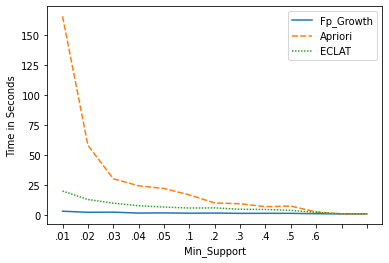

In [15]:
g = sns.lineplot(data=df)
g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels(['.01','.02', '.03','.04','.05', '.1', '.2','.3','.4', '.5', '.6'])
g.set(xlabel='Min_Support', ylabel='Time in Seconds')
plt.savefig(data+"_"+"Run time performance.png")